In [1]:
import os
import librosa
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Audio

In [2]:
train_df = pd.read_csv("../dataset/train.csv")
test_df = pd.read_csv("../dataset/test.csv")

DATASET_ROOT = "../dataset"
SAMPLING_RATE = 32000

path: ../dataset/./train/JFAWUOGJ.ogg


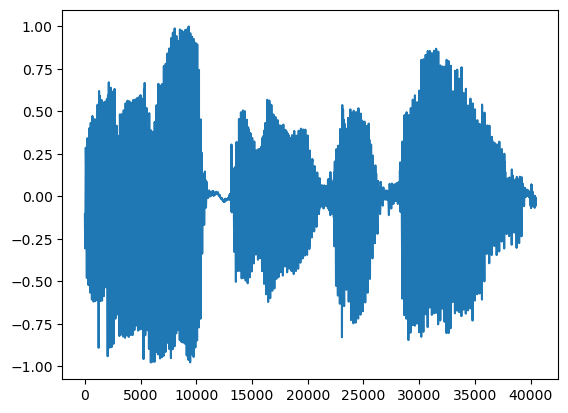

In [3]:
rel_path = train_df.iloc[1]["path"]
path = os.path.join(DATASET_ROOT, rel_path)

print(f"path: {path}")
audio, _ = librosa.load(path, sr=SAMPLING_RATE)
norm_audio = librosa.util.normalize(audio)

plt.plot(norm_audio)
Audio(audio, rate=SAMPLING_RATE)

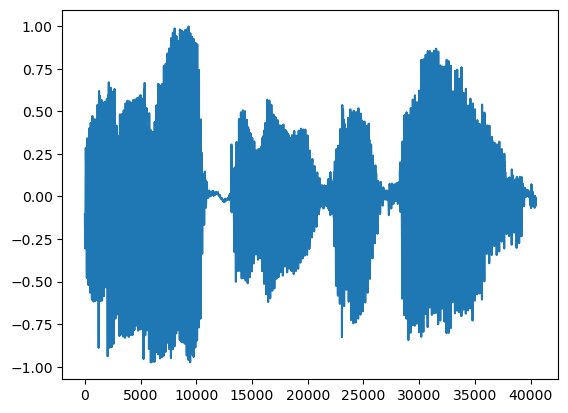

In [4]:
plt.plot(audio)

path: ../dataset/./test/TEST_00005.ogg


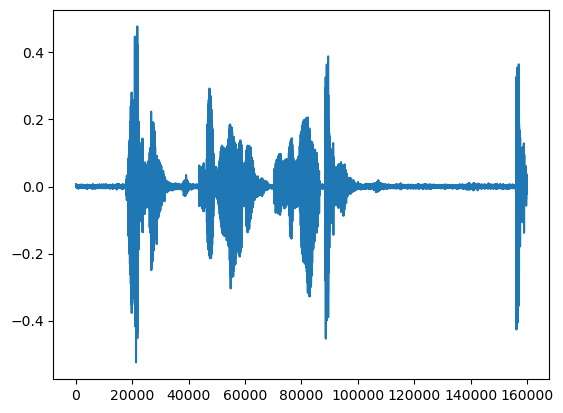

In [5]:
rel_path = test_df.iloc[5]["path"]
path = os.path.join(DATASET_ROOT, rel_path)

print(f"path: {path}")
audio, _ = librosa.load(path, sr=SAMPLING_RATE)

plt.plot(audio)
Audio(audio, rate=SAMPLING_RATE)

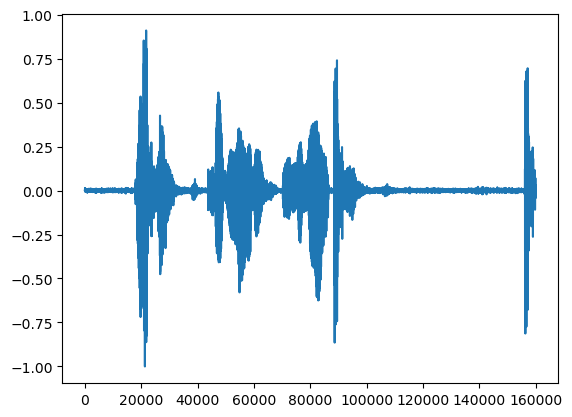

In [6]:
norm_audio = librosa.util.normalize(audio)
plt.plot(norm_audio)

In [7]:
Audio(norm_audio, rate=SAMPLING_RATE)

In [8]:
from src.datamodules import AASISTCenterLossDataset

In [9]:
train_dset = AASISTCenterLossDataset(df=train_df, train_mode=True)

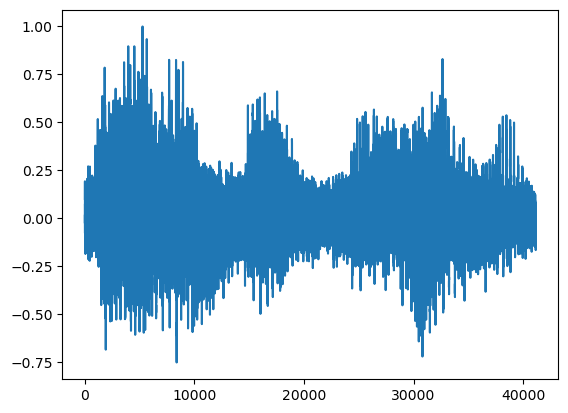

In [10]:
audio, _, _ = train_dset[1004]
plt.plot(audio)
Audio(audio, rate=SAMPLING_RATE)

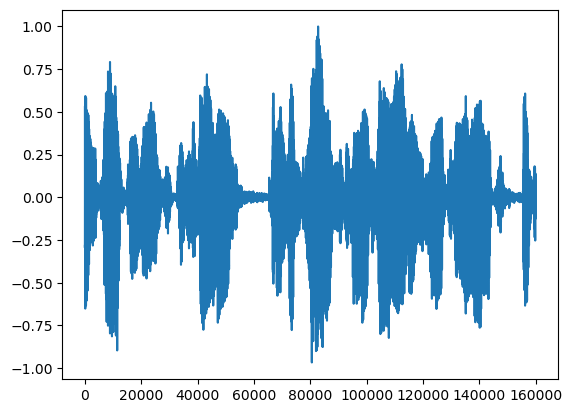

In [11]:
test_dset = AASISTCenterLossDataset(df=test_df, train_mode=False)
audio = test_dset[1001]
plt.plot(audio)
Audio(audio, rate=SAMPLING_RATE)

In [13]:
import torch
from src.AASIST import AASISTModule

AASIST_weight_path = "/home/work/joono/joono/joono/src/AASIST_weight/AASIST.pth"

classifier = AASISTModule()
classifier.load_state_dict(torch.load(AASIST_weight_path))



<All keys matched successfully>

In [14]:
classifier

AASISTModule(
  (conv_time): CONV()
  (first_bn): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=True)
  (drop_way): Dropout(p=0.2, inplace=True)
  (selu): SELU(inplace=True)
  (encoder): Sequential(
    (0): Sequential(
      (0): Residual_block(
        (conv1): Conv2d(1, 32, kernel_size=(2, 3), stride=(1, 1), padding=(1, 1))
        (selu): SELU(inplace=True)
        (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(32, 32, kernel_size=(2, 3), stride=(1, 1), padding=(0, 1))
        (conv_downsample): Conv2d(1, 32, kernel_size=(1, 3), stride=(1, 1), padding=(0, 1))
        (mp): MaxPool2d(kernel_size=(1, 3), stride=(1, 3), padding=0, dilation=1, ceil_mode=False)
      )
    )
    (1): Sequential(
      (0): Residual_block(
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(32, 32, kernel_size=